**Libraries** 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

**Preparing Dataset**

In [2]:
df = pd.read_csv('/kaggle/input/autompg-dataset/auto-mpg.csv')
df.head(20)
#df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


**Data Visualize**

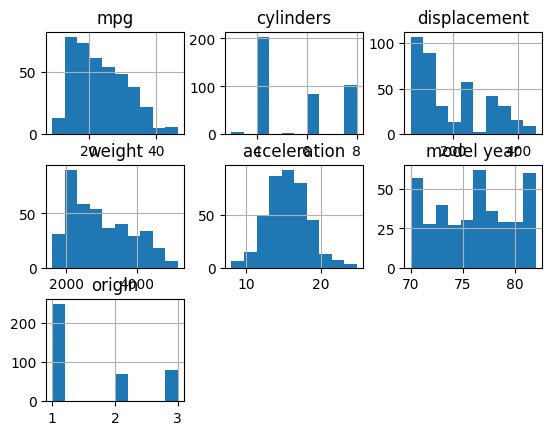

In [3]:
cdf = df[['acceleration', 'weight', 'horsepower', 'displacement', 'cylinders', 'mpg']]
df.hist()
plt.show()

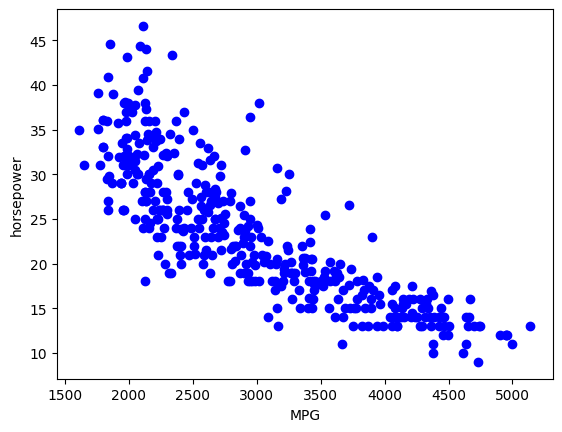

In [4]:
plt.scatter(cdf.weight, cdf.mpg, color = 'blue')
plt.ylabel('horsepower')
plt.xlabel('MPG')
plt.show()

**Creating test and train data**

In [5]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

**Creating Model**

In [6]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['weight']])
train_y = np.asanyarray(train[['mpg']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.00778212]]
Intercept:  [46.84283055]


Text(0, 0.5, 'mpg')

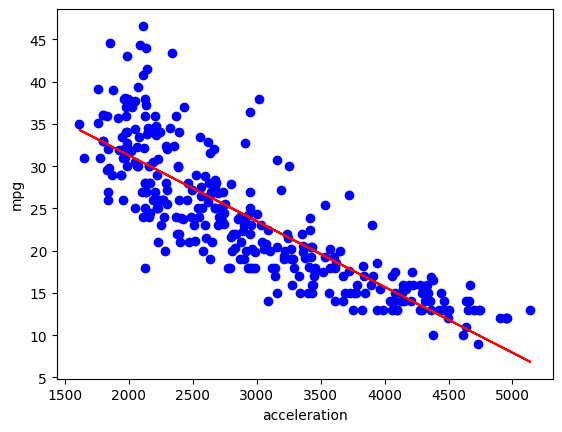

In [7]:
plt.scatter(train.weight, train.mpg,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("acceleration")
plt.ylabel("mpg")

**Evaluation**

In [8]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['weight']])
test_y = np.asanyarray(test[['mpg']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 3.04
Residual sum of squares (MSE): 15.44
R2-score: 0.66
